# Terrorism in the United States

Terrorism has been in the forefront of American News Media and U.S. Foreign policy for the greater part of the last two decades. The events of September 11th, 2001 vastly changed the landscape of how our country operates on a grand scale. 
This EDA looks to identify trends and patterns amongst attacks and lethality of those attacks utilizing University of Maryland’s Global Terrorism Database. 

## Introduction
   
   Terrorism is not a new concept in our society. Since its inception, the United States has been entangled with acts of Terrorism. The very inception of the country could be argued as an act of terrorism by American Colonialist against the British Crown. The Boston Tea Party, one of the most important events in America history and mythos, looked to change how taxation worked in the colonies through the destruction of property. Given the current U.S. Code of Federal Regulations definition, terrorism is;
   
    "…the unlawful use of force and violence against persons or property to intimidate or coerce a government, the civilian population, or any segment thereof, in furtherance of political or social objectives" (28 C.F.R. Section 0.85).  
   Many acts conducted by the American Colonialist during the American Revolution would fall under the clichéd saying of “One man’s terrorist is another’s freedom fighter.” If their acts of rebellion had failed, they most likely would have been hung for Treason.
   
   Although today, terrorism in the United States generally focuses on International Jihadi groups, both cognitively and monetarily, numerous movements have been active and wide reaching. Independence movements in the Caribbean, Left Wing movements of 1960s and 1970s, Right Wing movements of the 1980s, 1990s, and 2000s, and a long, torrid history of racism and anti-Semitism have all left scars on our national fabric. A number of other movements have been in direct response to terrorist attacks, such as attacks against innocent Americans of Muslim faith as a way for retaliation and retribution to Jihadism. 
   
   As such, given UMD’s Global Terrorism Database, analysis of events and their severity gives us a base to better identify growing threats in order to better specify the allocation of resources for the safety of our populace.


## Dataset

   UMD START’s Global Terrorism Database is the leading open source terrorism database in the world, with over 180,000 entries from reputable open media sources ranging from January 1, 1970 to December 31, 2016. The dataset categorizes entries both chronologically as well as by location. All entries retain a myriad of information from basic summaries of events, number of wounded and killed, split by U.S. citizenship, weapons used, target types, and methods used. 
    
   In order to simplify the dataset, this paper only uses events which occurred in the United States, to include all 50 states as well as the unincorporated territory of Puerto Rico. Two additional qualifiers have been added to distinguish the ideology of the group who perpetrated the attack (whether right wing, left wing, nationalist, racial supremacy, ecoterrorism, or anti-religious.), as well as a categorization of the type of racial supremacist group (white, black, or Jewish).
    
   Finally, the dataset is missing information pertaining to the year 1993. This is due to the dataset that GTD was built off of being initially hardcopy index cards, which were lost when converting to a digital format.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the file for use.
file = "C:/Users/josep/Documents/Python Scripts/US Terrorism.csv"

terror = pd.read_csv(file, sep=',', encoding='latin-1')

In [39]:
terror.head()

,iyear,imonth,iday,country_txt,provstate,city,latitude,longitude,location,success,...,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ransom,ransomamt
0,1995,2,28,United States,California,San Francisco,37.777125,-122.419644,NaN,1,...,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN
1,1970,4,13,United States,Missouri,Kansas City,39.102960,-94.583062,NaN,1,...,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,Natural gas regulator of Church was destroyed....,0.0,NaN
2,1971,3,6,United States,Texas,Texarkana,33.425580,-94.048254,The incident occurred at New Town Church.,1,...,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),200000.0,The church was destroyed.,0.0,NaN
3,1971,3,6,United States,Texas,Texarkana,33.425580,-94.048254,The incident occurred at New Town Church.,1,...,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),175000.0,The church was destroyed.,0.0,NaN
4,1971,3,7,United States,Texas,Texarkana,33.425580,-94.048254,The incident occurred at New Town Church.,0,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN


## Analysis

The first thing to look at is the number of attacks over the years to identify trends. 

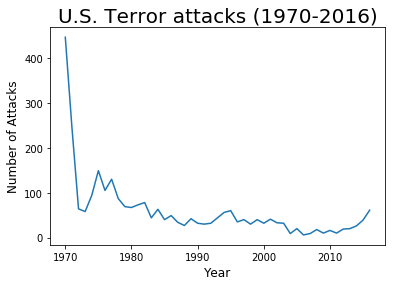

In [118]:
# Count the number of instances of terrorist attacks per year since 1970
terror_per_year = terror.groupby('iyear').iyear.count()

plt.plot(terror_per_year)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Attacks', fontsize = 12)
plt.title('U.S. Terror attacks (1970-2016)', fontsize = 20)
plt.show()


Clearly, over time we can see that the number of attacks have been generally decreasing since 1970. This is most likely due to the large political strife occuring as a response to the Vientnam War. As such, as the war drew down, so did much of the acts of violence. 

Enterestingly enough, very little laws were put in place against terrorism until the mid 90s, depsite the large amount of attacks in the 1970s. If we look at a plot of deaths per year, we notice why this might be the case.

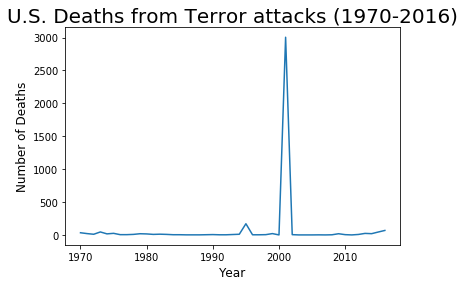

Text(0.5,1,'U.S. Deaths from Terror attacks (2002-2016)')

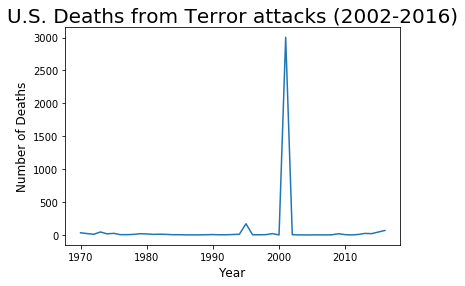

In [142]:
# Count the number of deaths of terrorist attacks per year since 1970
deaths_per_year = terror.groupby('iyear').nkill.sum()

plt.plot(deaths_per_year)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Deaths', fontsize = 12)
plt.title('U.S. Deaths from Terror attacks (1970-2016)', fontsize = 20)
plt.show()

# Count the number of deaths of terrorist attacks per year since 1970
deaths_2001_on = terror.iyear > 2001
deaths_2001_on = terror.groupby('iyear').nkill.sum()

plt.plot(deaths_2001_on)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Deaths', fontsize = 12)
plt.title('U.S. Deaths from Terror attacks (2002-2016)', fontsize = 20)


Despite the large number of attacks, very few people were killed through the entirety of the 1970s and 1980s. Much of the terrorism was perpatrated by left wing groups or eco terrorist typically looking to make a point without hurting other individuals. 

Very noticable are the events of the Oklahoma City Bombing and the attacks on September 11th, 2001. They stand out far and away comparitively to the rest of the years. These two events, due to their extreme severity, caused numerous laws seemingly to protect Americans from further terrorist events. 

If we take a look at post September 11th, we will observe that although initially the number of attacks and number of fatalities is decreasing, around 2012 we notice an uptick in violence. To delve more into why, we need to take a look at what ideologies are commiting these attacks.